In [1]:
from pathlib import Path
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.filters import gaussian
from skimage.feature import canny
import pickle
import gzip
import torch

In [2]:
#读取数据
DATA_PATH = Path("../data")
PATH = DATA_PATH / "MNIST"
FILENAME = 'mnist.pkl.gz'
with gzip.open((PATH/FILENAME).as_posix(),"rb") as f:
    ((x_train,y_train),(x_valid,y_valid),_) = pickle.load(f,encoding="latin-1")

    x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

    x_train = x_train.numpy()
    y_train = y_train.numpy()
    x_valid = x_valid.numpy()
    y_valid = y_valid.numpy()
#读取数据完成
print("load over")


load over


# 绘制MNIST图像样例

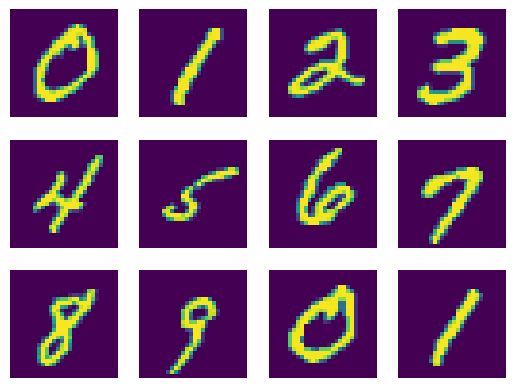

In [6]:
for i in range(12):
    plt.sca(plt.subplot(3,4,i+1))
    plt.imshow(x_train[i*2+1].reshape(28,28))
    plt.axis("off")
plt.savefig("../Figure/MNIST_Sample.jpg",dpi=200)
plt.show()

# 绘制Canny算子的处理结果

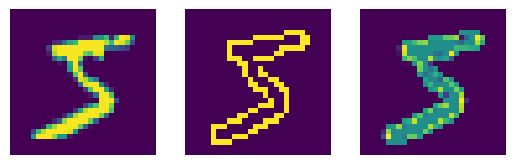

In [4]:
img = x_train[0]
plt.sca(plt.subplot(1,3,1))
plt.axis("off")
plt.imshow(img.reshape(28,28))
img_canny = canny(x_train[[0]].reshape(28,28))
plt.sca(plt.subplot(1,3,2))
plt.axis("off")
plt.imshow(img_canny)
img = img+img_canny.reshape(1,784)
plt.sca(plt.subplot(1,3,3))
plt.axis("off")
plt.imshow(img.reshape(28,28))
plt.savefig("../Figure/Canny.jpg",dpi=200)
plt.show()

# 高斯平滑和USM

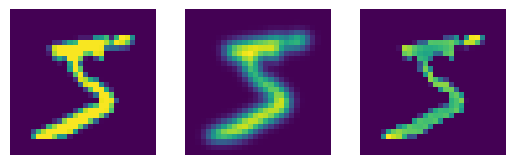

In [5]:
img = x_train[0]
plt.sca(plt.subplot(1,3,1))
plt.axis("off")
plt.imshow(img.reshape(28,28))
img_gaussian = gaussian_filter(x_train[[0]].reshape(28,28),sigma=1)
plt.sca(plt.subplot(1,3,2))
plt.axis("off")
plt.imshow(img_gaussian)



img= x_train[0].reshape(28,28)

img = img * 1.0
gauss_out = gaussian(img, sigma=2)

alpha = 5
img_out = (img - gauss_out) * alpha + img
img_out = img_out/255.0

mask_1 = img_out  < 0
mask_2 = img_out  > 1
img_out = img_out * (1-mask_1)
img_out = img_out * (1-mask_2) + mask_2

img_USM = img_out

plt.sca(plt.subplot(1,3,3))
plt.axis("off")
plt.imshow(img_USM)
plt.savefig("../Figure/USM_Gaussian.jpg",dpi=200)
plt.show()